# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

En este bloque se descarga un archivo llamado simpsons_train.tar.gz desde Dropbox y lo guarda localmente con ese nombre.

In [1]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-18 21:11:00--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc96aed50281bbf921eed9c106cf.dl.dropboxusercontent.com/cd/0/inline/Cp7EyLJWwjvWyYeKnjVztBukSxHMMFt-8IEMfmhiCt3q668jAPRXLSiI7gdHIHrPEG8Z6l4uHBYu6-hsP45VneViYuC0DyNaF7OGTyq7RBUiozKm94Hk2yO7PypdNyfChmWVcp8HMct0zWIkc44hHT4X/file# [following]
--2025-05-18 21:11:00--  https://uc96aed50281bbf921eed9c106cf.dl.dropboxusercontent.com/cd/0/inline/Cp7EyLJWwjvWyYeKnjVztBukSxHMMFt-8IEMfmhiCt3q668jAPRXLSiI7gdHIHrPEG8Z6l4uHBYu6-hsP45VneViYuC0DyNaF7OGTyq7RBUiozKm94Hk2yO7PypdNyfChmWVcp8HMct0zWIkc44hHT4X/file
Resolving uc96aed50281bbf921eed9c106cf.dl.dropboxusercontent.com (uc96aed50281bbf921eed9c106cf.dl.dropboxusercontent.com)... 162.125.

En este bloque se descarga un archivo llamado simpsons_test.tar.gz desde Dropbox y lo guarda localmente con ese nombre.

In [2]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-18 21:11:26--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce2ceae2b78076c57b4ac5ae8b3.dl.dropboxusercontent.com/cd/0/inline/Cp4PBvFit-N4iKJ5xXbiekSNiIXt-j3Xsc7bTAmpwi6r_w8NoWYf8Q0Kp5EkeFDXlNaQxXMCZ-zFHco0Ar6ml-R5eTlH9_cGpEERpA3Mk8mOkvJ4QVuJ0eVwctOy2CKlx-LqZdamiInbkVbqljxrK0DB/file# [following]
--2025-05-18 21:11:27--  https://uce2ceae2b78076c57b4ac5ae8b3.dl.dropboxusercontent.com/cd/0/inline/Cp4PBvFit-N4iKJ5xXbiekSNiIXt-j3Xsc7bTAmpwi6r_w8NoWYf8Q0Kp5EkeFDXlNaQxXMCZ-zFHco0Ar6ml-R5eTlH9_cGpEERpA3Mk8mOkvJ4QVuJ0eVwctOy2CKlx-LqZdamiInbkVbqljxrK0DB/file
Resolving uce2ceae2b78076c57b4ac5ae8b3.dl.dropboxusercontent.com (uce2ceae2b78076c57b4ac5ae8b3.dl.dropboxusercontent.com)... 162.125.6

En el siguiente bloque se extrae una carpeta que contiene subcarpetas con imágenes organizadas por clase (personaje de los simpson) para el conjunto de train.

In [3]:
!tar -xzvf simpsons_train.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/pic_00

En el siguiente bloque se extrae una carpeta que contiene subcarpetas con imágenes organizadas por clase (personaje de los simpson) para el conjunto de test.

In [4]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

La red neuronal convolucional (CNN) será construida y diseñada con claridad, detallando cada etapa del proceso de desarrollo del modelo. Para la implementación se elegirán los frameworks TensorFlow y Keras, debido a su capacidad para facilitar la creación y entrenamiento de modelos de deep learning de forma modular y eficiente. Estas herramientas cuentan con amplia documentación y soporte, lo que garantiza una integración sencilla con otras librerías y un buen rendimiento en el procesamiento de imágenes, justificando así su selección técnica para el proyecto. Además, estas son las herramientas que se han utilizado principalmente en el ámbito educativo, y aunque existen otras alternativas que podrían ser igualmente útiles, no se ha incursionado en ellas en este trabajo.

En la siguiente sección se presentan las librerías que se importarán para el desarrollo de este proyecto de deep learning, acompañadas de un resumen sobre su función y utilidad dentro del mismo.

**OpenCV (cv2):** Biblioteca para procesamiento y manipulación de imágenes, utilizada para cargar, transformar y mostrar imágenes dentro del flujo de trabajo.

**os:** Módulo de Python para interactuar con el sistema operativo, gestionar archivos y directorios necesarios para organizar los datos.

**pprint:** Utilizado para imprimir estructuras de datos de forma legible y ordenada, facilitando la depuración y análisis durante el desarrollo.

**NumPy:** Biblioteca fundamental para el manejo de arreglos multidimensionales y operaciones matemáticas eficientes, clave para procesar datos de imágenes y etiquetas.

**Keras:** Framework de alto nivel para construir y entrenar redes neuronales, facilita la definición de modelos de manera intuitiva y modular.

**glob:** Módulo para encontrar rutas de archivos que coinciden con patrones, usado para gestionar y cargar conjuntos de datos de imágenes.

**Matplotlib y matplotlib.pyplot:** Herramientas para la visualización gráfica, que permiten mostrar imágenes, resultados de predicciones y métricas de entrenamiento.

**pandas:** Biblioteca para manipulación y análisis de datos tabulares, útil para organizar información relacionada con las imágenes o etiquetas.

**collections:** Proporciona estructuras de datos como contadores, usadas para analizar la distribución de clases en el dataset.

**tensorflow:** Plataforma integral para machine learning y deep learning, base sobre la cual se construyen y entrenan las redes neuronales.

**absl.logging:** Utilizado para controlar y reducir mensajes de log, ayudando a mantener la consola limpia durante la ejecución.

**random:** Módulo para generación de números aleatorios, empleado en selección aleatoria de imágenes o datos para entrenamiento y pruebas.

**google.colab.patches.cv2_imshow:** Función adaptada para mostrar imágenes dentro de Google Colab, reemplazando la función estándar de OpenCV que no funciona en ese entorno.

**tensorflow.keras.layers y Model:** Componentes para construir las capas de la red neuronal y definir el modelo funcional o secuencial.

**tensorflow.keras.optimizers:** Optimizadores como Adam, SGD y otros, que permiten ajustar los pesos de la red durante el entrenamiento.

**sklearn.metrics.confusion_matrix:** Función para evaluar el rendimiento del modelo a través de la matriz de confusión.

**sklearn.model_selection.train_test_split:** Herramienta para dividir el conjunto de datos en subconjuntos de entrenamiento y prueba de forma aleatoria y controlada.

**tensorflow.keras.preprocessing.image.ImageDataGenerator:** Generador para aumentar datos de imagen en tiempo real mediante transformaciones, ayudando a mejorar la generalización del modelo.

**time:** Módulo para medir tiempos de ejecución, útil para evaluar la duración del entrenamiento o inferencia.

Las librerías y herramientas seleccionadas para este proyecto son ampliamente reconocidas y utilizadas en el ámbito del deep learning, lo que garantiza un buen soporte y documentación. Además, son compatibles entre sí y permiten construir modelos de manera eficiente y flexible. Asimismo, estos frameworks, librerías y herramientas son los que se utilizan durante el aprendizaje en clases, facilitando así su aplicación práctica y comprensión.

In [5]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import random
import math


from google.colab.patches import cv2_imshow
from tensorflow.keras import layers, Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import backend as keras_backend
from time import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping

En esta sección del notebook se definen dos funciones encargadas de cargar y preprocesar los datos de entrenamiento y prueba. La función load_train_set permite recorrer las carpetas correspondientes a cada personaje, leer las imágenes, redimensionarlas a un tamaño uniforme y asociarlas a su respectiva etiqueta según el mapeo entregado. Por su parte, load_test_set realiza el mismo proceso, pero aplicado a las imágenes del conjunto de prueba. Ambas funciones devuelven los arreglos X (imágenes) e y (etiquetas), listos para ser utilizados en el entrenamiento y evaluación del modelo.

In [6]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

En esta parte del notebook se define un diccionario llamado MAP_CHARACTERS, el cual establece un mapeo entre un número de clase (de 0 a 17) y el nombre de cada uno de los 18 personajes más representados en el dataset. Esto permite asociar cada imagen a una etiqueta numérica correspondiente. Además, se fija la constante IMG_SIZE con valor 64, indicando que todas las imágenes serán redimensionadas a un tamaño estándar de 64x64 píxeles para facilitar su procesamiento por el modelo.

In [7]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

En esta sección del notebook, se cargan los conjuntos de datos de entrenamiento y prueba. Se definen las rutas de los datos para el conjunto de entrenamiento (DATASET_TRAIN_PATH_COLAB) y el conjunto de prueba (DATASET_TEST_PATH_COLAB). Luego, se utilizan las funciones load_train_set y load_test_set para cargar las imágenes y sus etiquetas, asignándolas a las variables X, y (para entrenamiento) y X_test, y_test (para prueba). Estos conjuntos de datos serán utilizados posteriormente para entrenar y evaluar el modelo de clasificación de imágenes.

In [8]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


En esta sección se realiza una permutación aleatoria de los datos de entrada (X) y sus etiquetas (y). Esto es crucial para asegurar que los datos de entrenamiento y validación estén distribuidos de manera aleatoria y no estén sesgados por el orden en que fueron cargados. Sin esta barajadura, es posible que el conjunto de validación contenga imágenes de un solo personaje, lo que afectaría la generalización del modelo.

In [9]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

En esta sección el código divide el conjunto de datos de entrenamiento original en dos subconjuntos: uno para entrenamiento (80%) y otro para validación (20%), utilizando la función train_test_split. Además, imprime detalles sobre las dimensiones y el número de imágenes en cada conjunto (entrenamiento, validación y prueba), así como la resolución de las imágenes y el número de canales de color. Esta división asegura que el modelo se entrene adecuadamente y se valide con datos que no haya visto durante el entrenamiento.

In [10]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


En la siguiente sección se muestra la distribución de las clases mediante un grafico de barra que ayuda a la mejor visualización de estos datos.

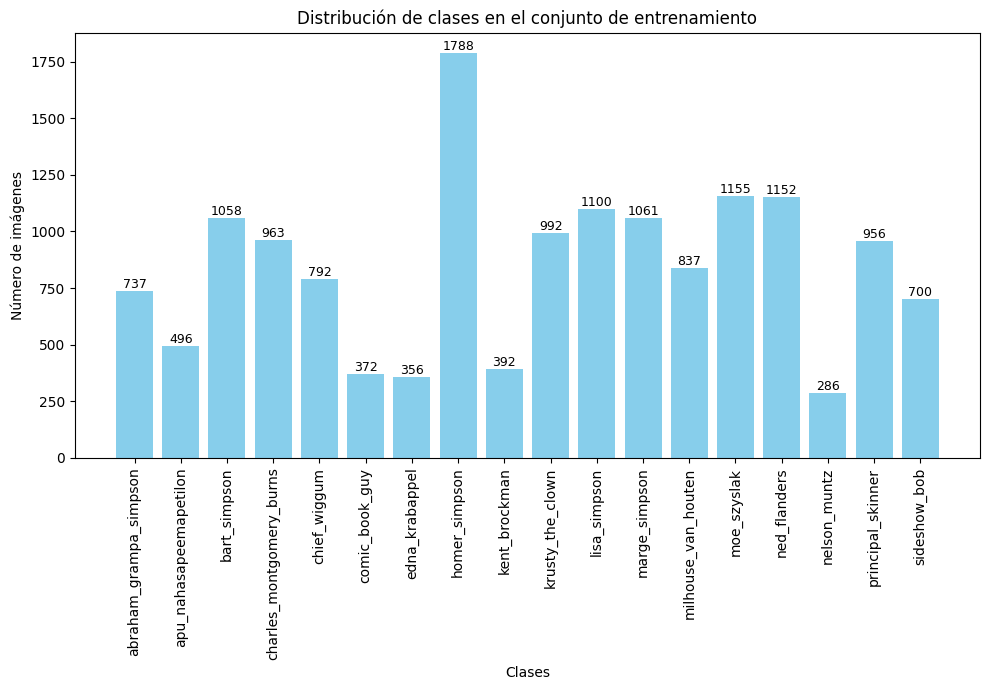

In [11]:

# Contar las clases
class_counts = np.bincount(y_train)
class_labels = [MAP_CHARACTERS[i] for i in range(len(class_counts))]

# Crear gráfico de barras
plt.figure(figsize=(10, 7))
bars = plt.bar(class_labels, class_counts, color='skyblue')
plt.xlabel("Clases")
plt.ylabel("Número de imágenes")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xticks(rotation=90)

# Mostrar el número de imágenes encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

En la siguiente sección se muestra el código que implementa una técnica de aumento de datos para equilibrar las clases en el conjunto de entrenamiento (x_train). Utiliza la clase ImageDataGenerator de Keras para generar imágenes aumentadas mediante transformaciones como rotación, desplazamiento, corte, zoom y volteo horizontal. El código detecta las clases con menos imágenes en el conjunto y genera nuevas imágenes hasta igualar el número de ejemplos de la clase más representada. Después de la generación, combina las imágenes originales con las aumentadas y muestra la distribución final de las clases balanceadas.

In [12]:

# Crear el generador de aumento
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Contar imágenes por clase en y_train
class_counts = Counter(y_train)
max_count = max(class_counts.values())
print("Distribución original de entrenamiento:", class_counts)

X_augmented = []
y_augmented = []

for class_label, count in class_counts.items():
    if count < max_count:
        n_to_generate = max_count - count
        print(f"Aumentando clase {class_label} ({MAP_CHARACTERS[class_label]}): generando {n_to_generate} imágenes...")

        # Filtrar imágenes de esa clase
        class_indices = np.where(y_train == class_label)[0]
        class_images = X_train[class_indices]

        for _ in range(n_to_generate):
            img = random.choice(class_images)
            img = np.expand_dims(img, axis=0)  # Para el generador
            augmented_img = next(datagen.flow(img, batch_size=1, shuffle=False))[0].astype('uint8')
            X_augmented.append(augmented_img)
            y_augmented.append(class_label)

# Combinar el conjunto de entrenamiento original con el aumentado
X_train = np.concatenate([X_train, np.array(X_augmented)], axis=0)
y_train = np.concatenate([y_train, np.array(y_augmented)], axis=0)

# Verificar nueva distribución balanceada
print("Nueva distribución de entrenamiento:", Counter(y_train))

Distribución original de entrenamiento: Counter({np.int64(7): 1788, np.int64(13): 1155, np.int64(14): 1152, np.int64(10): 1100, np.int64(11): 1061, np.int64(2): 1058, np.int64(9): 992, np.int64(3): 963, np.int64(16): 956, np.int64(12): 837, np.int64(4): 792, np.int64(0): 737, np.int64(17): 700, np.int64(1): 496, np.int64(8): 392, np.int64(5): 372, np.int64(6): 356, np.int64(15): 286})
Aumentando clase 2 (bart_simpson): generando 730 imágenes...
Aumentando clase 12 (milhouse_van_houten): generando 951 imágenes...
Aumentando clase 11 (marge_simpson): generando 727 imágenes...
Aumentando clase 9 (krusty_the_clown): generando 796 imágenes...
Aumentando clase 13 (moe_szyslak): generando 633 imágenes...
Aumentando clase 3 (charles_montgomery_burns): generando 825 imágenes...
Aumentando clase 0 (abraham_grampa_simpson): generando 1051 imágenes...
Aumentando clase 1 (apu_nahasapeemapetilon): generando 1292 imágenes...
Aumentando clase 5 (comic_book_guy): generando 1416 imágenes...
Aumentando c

En esta sección se muestra una grilla que contiene una imagen original junto con varias de sus versiones aumentadas mediante técnicas de data augmentation. Esta visualización permite verificar que las transformaciones aplicadas (como rotaciones, desplazamientos, zoom, entre otras) se estén generando correctamente y que las imágenes resultantes conserven características visuales coherentes con la imagen original. Esto es útil para asegurar que los datos aumentados aporten variabilidad sin perder información relevante.

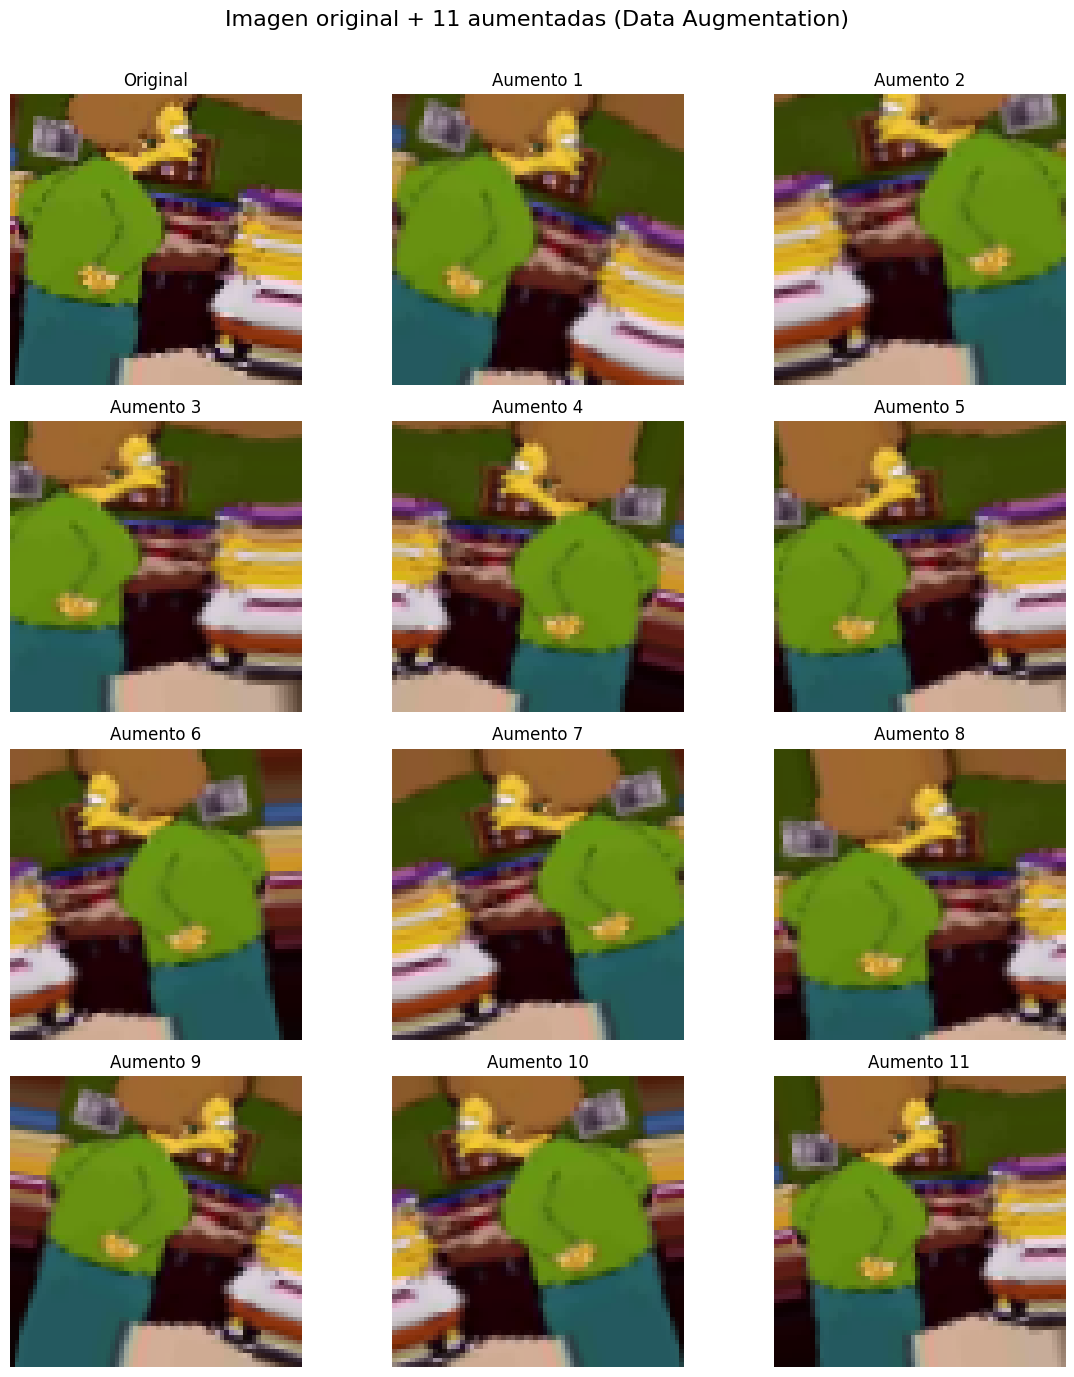

In [13]:
# Seleccionar una imagen al azar del dataset original de entrenamiento (para reflejar los aumentos en train)
random_index = np.random.randint(0, X_train.shape[0])
img = X_train[random_index]
img_batch = np.expand_dims(img, axis=0)

# Crear un generador a partir de esta imagen usando el datagen ya definido para aumentos
gen = datagen.flow(img_batch, batch_size=1)

# Crear figura con 4x3 subplots
fig, axs = plt.subplots(4, 3, figsize=(12, 14))
fig.suptitle("Imagen original + 11 aumentadas (Data Augmentation)", fontsize=16)

# Mostrar la imagen original en la primera posición
axs[0, 0].imshow(img.astype('uint8'))
axs[0, 0].set_title("Original")
axs[0, 0].axis('off')

# Generar y mostrar 11 imágenes aumentadas
for i in range(1, 12):
    augmented_img = next(gen)[0].astype('uint8')
    row, col = divmod(i, 3)
    axs[row, col].imshow(augmented_img)
    axs[row, col].set_title(f"Aumento {i}")
    axs[row, col].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Aunque la técnica de data augmentation es una estrategia eficaz para incrementar la diversidad del conjunto de datos y reducir el sesgo entre clases, en este caso su impacto sobre la capacidad de generalización del modelo es limitado debido a la baja variabilidad entre las imágenes originales. Las transformaciones aplicadas como rotaciones leves (rotation_range=15), pequeños desplazamientos (width_shift_range=0.1, height_shift_range=0.1), volteos horizontales y zoom moderado— se mantuvieron intencionalmente suaves para evitar la pérdida de características relevantes. Esto se debe a que las imágenes tienen una resolución de solo 64x64 píxeles, por lo que cualquier transformación más agresiva podría distorsionar detalles importantes y afectar la capacidad del modelo para aprender representaciones útiles. En este sentido, el data augmentation en este caso cumple principalmente una función de balanceo entre clases, con un impacto mínimo en la incorporación de nuevas características visuales útiles para el entrenamiento.

En esta sección del notebook se muestra la distribución de las clases después del aumento de datos con ayuda de un gráfico de barras para la mejor visualización y mejor entendimiento.

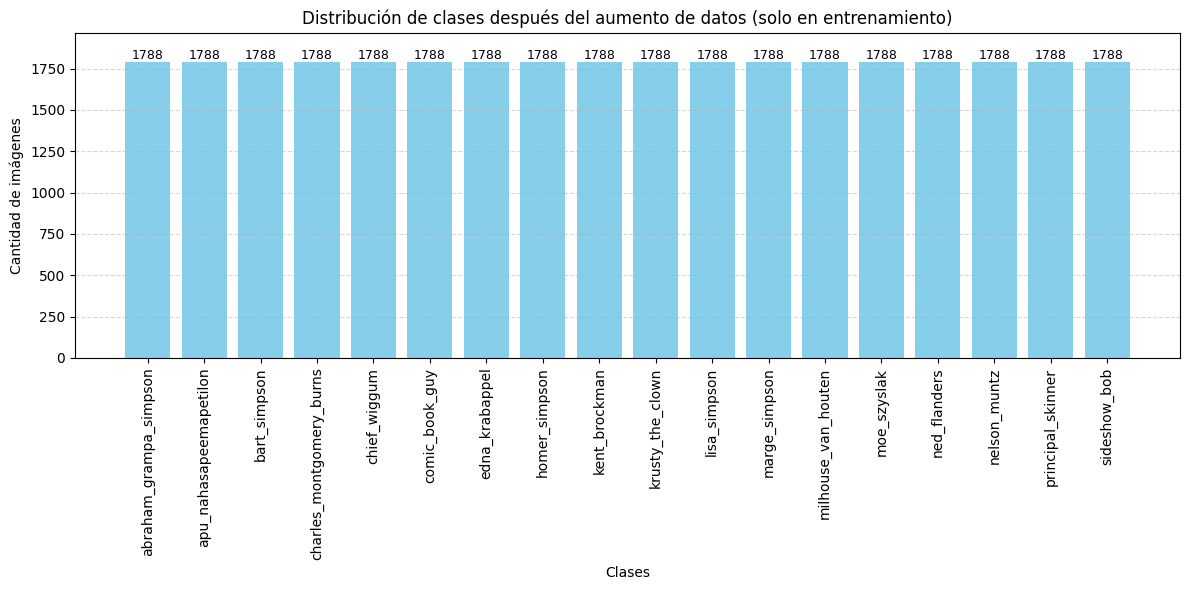

In [14]:
# Contar la distribución después del aumento
class_counts_post_aug = Counter(y_train)

labels = [MAP_CHARACTERS[i] for i in sorted(class_counts_post_aug.keys())]
counts = [class_counts_post_aug[i] for i in sorted(class_counts_post_aug.keys())]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Etiquetas encima de cada barra
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5, str(count),
             ha='center', va='bottom', fontsize=9)

plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de clases después del aumento de datos (solo en entrenamiento)")

plt.xticks(rotation=90)  # Nombres en vertical

# Ajustar límite del eje Y para reducir escala (ajusta el número según convenga)
max_count = max(counts)
plt.ylim(0, max_count * 1.1)  # Un poco más arriba de la barra más alta

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

En este bloque de código se genera una visualización aleatoria de algunas imágenes del conjunto de prueba. Se crea una grilla de 4x4 (16 imágenes en total), donde se muestra una imagen aleatoria por celda junto con el nombre del personaje correspondiente. Esta visualización permite revisar ejemplos reales del dataset y confirmar que las imágenes y sus etiquetas están correctamente asignadas.

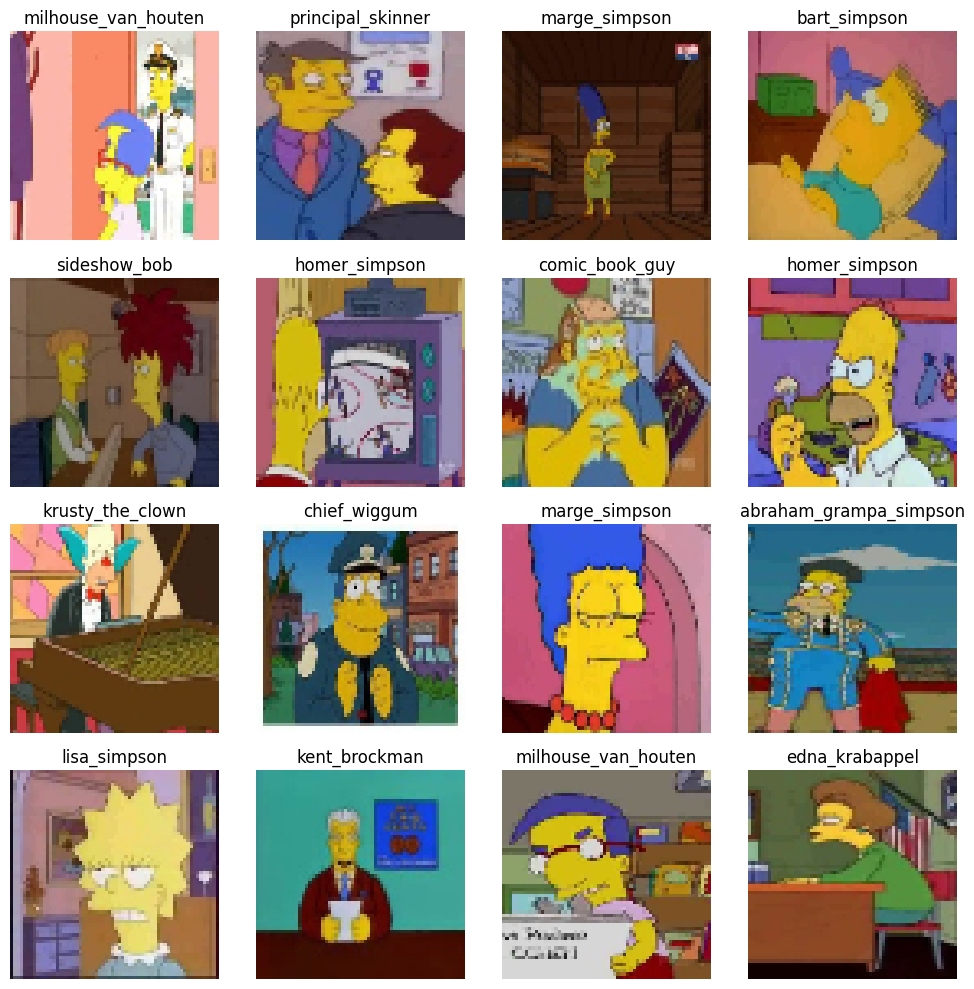

In [15]:
h = 4  # alto de la grilla
w = 4  # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(2.5*h, 2.5*w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(X_test))
        axs[i, j].imshow(X_test[ex])
        axs[i, j].set_title(MAP_CHARACTERS[y_test[ex]])
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

En esta sección, se normalizan las imágenes para mejorar la eficiencia del entrenamiento y se convierten las etiquetas a codificación one-hot, permitiendo que el modelo trabaje correctamente en tareas de clasificación multiclase. También se verifica que las dimensiones de los datos transformados sean las esperadas antes de continuar con el entrenamiento.

In [16]:
# Normaliza las imágenes (pasa de [0, 255] a [0.0, 1.0])
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convierte las etiquetas a one-hot encoding
Y_train = keras.utils.to_categorical(y_train, num_categ)
Y_val = keras.utils.to_categorical(y_val, num_categ)
Y_test = keras.utils.to_categorical(y_test, num_categ)

print(X_train.shape, X_val.shape, X_test.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(32184, 64, 64, 3) (3799, 64, 64, 3) (890, 64, 64, 3)
(32184, 18) (3799, 18) (890, 18)


# Definición de modelos

Se comenzará utilizando un modelo base con el objetivo de establecer una línea de referencia sobre su rendimiento inicial. Este modelo permitirá evaluar el comportamiento del conjunto de datos y detectar posibles debilidades en cuanto a precisión, generalización o sobreajuste. En caso de que el rendimiento obtenido no cumpla con los estándares deseados, se procederá a implementar una serie de mejoras progresivas. Estas mejoras incluirán técnicas de normalización, optimización de hiperparámetros y la exploración de distintas arquitecturas de redes neuronales. Además, se evaluarán estrategias como el aumento de datos, el uso de capas adicionales o funciones de activación más eficientes. El objetivo final es ajustar y perfeccionar el modelo hasta alcanzar el rendimiento requerido para la tarea, garantizando así resultados confiables y robustos.

En este proyecto no se utilizarán las métricas F1 score, recall ni precisión porque están diseñadas principalmente para problemas de clasificación binaria, es decir, cuando solo hay dos clases. Como en este caso se trata de una clasificación multiclase, esas métricas no son tan útiles ni fáciles de interpretar. Además, las clases están balanceadas, por lo que no es necesario enfocarse en el rendimiento por clase. Por esta razón, se utilizará la métrica accuracy, ya que en escenarios con clases balanceadas resulta confiable para evaluar el desempeño general del modelo. También se empleará la métrica loss, que indica qué tan bien el modelo se ajusta a los datos de entrenamiento, siendo una herramienta clave para identificar problemas como el sobreentrenamiento.

## Modelo base

El modelo base está compuesto por una arquitectura sencilla de red neuronal convolucional que incluye dos capas Conv2D con activación ReLU y padding='same', seguidas de capas MaxPooling2D para reducir la dimensionalidad espacial. Posteriormente, las características extraídas se aplanan con Flatten y se conectan a dos capas densas intermedias de 128 y 64 neuronas, respectivamente. La salida corresponde a una capa Dense con 18 neuronas y activación softmax, adecuada para tareas de clasificación multiclase.

Se utilizó el optimizador SGD debido a su rapidez y eficiencia en problemas de clasificación básicos, especialmente en etapas iniciales donde el objetivo es establecer una línea base de rendimiento. El modelo fue compilado con la función de pérdida categorical_crossentropy y evaluado con las métricas de precisión (accuracy) y F1 Score, esta última útil para reflejar el desempeño en conjuntos de datos con clases desbalanceadas.

Este modelo base sirve como punto de partida para analizar el rendimiento inicial y evaluar mejoras posteriores en la arquitectura o en la configuración del entrenamiento, con el fin de optimizar los resultados obtenidos.

En la siguiente sección se define la arquitectura de la red base con la que se iniciará este proyecto.

In [17]:
# Setea los seed para números random

np.random.seed(10)
tf.random.set_seed(10)

# Crea una red neuronal convolucional simple

red_conv = keras.Sequential(name="red_neuronal_1")

red_conv.add(Input(shape=(64, 64, 3), name="entrada"))

red_conv.add(Conv2D(64, (3,3), activation='relu', padding='same', name="convolucion_1"))
red_conv.add(MaxPooling2D((2,2), name="pooling_1"))

red_conv.add(Conv2D(32, (3,3), activation='relu', padding='same', name="convolucion_2"))
red_conv.add(MaxPooling2D((2,2), name="pooling_2"))

red_conv.add(Flatten(name="flatten_1"))

red_conv.add(Dense(128, activation='relu', name="densa_1"))
red_conv.add(Dense(64, activation='relu', name="densa_2"))
red_conv.add(Dense(18, activation='softmax', name="salida"))

red_conv.summary()

red_conv.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "red_neuronal_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densa_1 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densa_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         1,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,078,386 (4.11 MB)

 Trainable params: 1,078,386 (4.11 MB)

 Non-trainable params: 0 (0.00 B)

Este resumen corresponde a la arquitectura de la red_neuronal_1. Cada fila representa una capa del modelo, indicando:

**Layer (type): el nombre y tipo de capa.**

**Output Shape: la forma (dimensiones) de la salida de esa capa.**

**Param #: la cantidad de parámetros entrenables en esa capa.**

- **convolucion_1 (Conv2D)**

  (filtro_ancho * filtro_alto * canales_entrada + bias) * filtros_salida
→ (3×3×3 + 1) × 64 = 1,792


- **convolucion_2 (Conv2D)**
  
  (3×3×64 + 1) × 32 = 18,464


- **densa_1 (Dense)**

  8192 (entrada) × 128 (salida) + 128 (bias) = 1,048,704

- **densa_2 (Dense)**

   128 × 64 + 64 = 8,256

- **salida (Dense)**

   64 × 18 + 18 = 1,170



En la siguiente sección se hace el entrenamiento de la red.

In [18]:
start_time = time()
hist = red_conv.fit(
    X_train,Y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_val,Y_val)
)
end_time = time()
time_1 = end_time - start_time
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time - start_time))

red_conv.save("primer_modelo.h5")

Epoch 1/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.1221 - loss: 2.7765 - val_accuracy: 0.3735 - val_loss: 2.0974
Epoch 2/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.4228 - loss: 1.9592 - val_accuracy: 0.5067 - val_loss: 1.6638
Epoch 3/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5429 - loss: 1.5553 - val_accuracy: 0.5759 - val_loss: 1.4492
Epoch 4/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6127 - loss: 1.3232 - val_accuracy: 0.6228 - val_loss: 1.2970
Epoch 5/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6689 - loss: 1.1325 - val_accuracy: 0.6410 - val_loss: 1.2114
Epoch 6/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.9688 - val_accuracy: 0.6704 - val_loss: 1.1547
Epoch 7/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7570 - loss: 0.8268 - val_accuracy: 0.6910 - val_loss: 1.1248
Epoch 8/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7941 - loss: 0.69

Luego del entrenamiento se puede observar que el valor de loss no es tan bajo en la validacion, lo cual podría indicar problemas de sobreentrenamiento. Esto se confirma al analizar la diferencia entre accuracy y val_accuracy, ya que se aprecia una brecha considerable entre ambos valores. Aunque el accuracy de entrenamiento es alto, no es confiable debido a esta diferencia, ya que el modelo no generaliza bien a nuevos datos. Esto es una señal clara de sobreentrenamiento, lo que sugiere la necesidad de ajustar el modelo para mejorar su capacidad de generalización.

En el siguiente bloque se genera una cuadrícula de 4x4 que muestra predicciones aleatorias realizadas sobre el conjunto de datos de prueba (testing). Cada imagen presentada incluye la predicción del modelo junto con su etiqueta real para facilitar la comparación.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


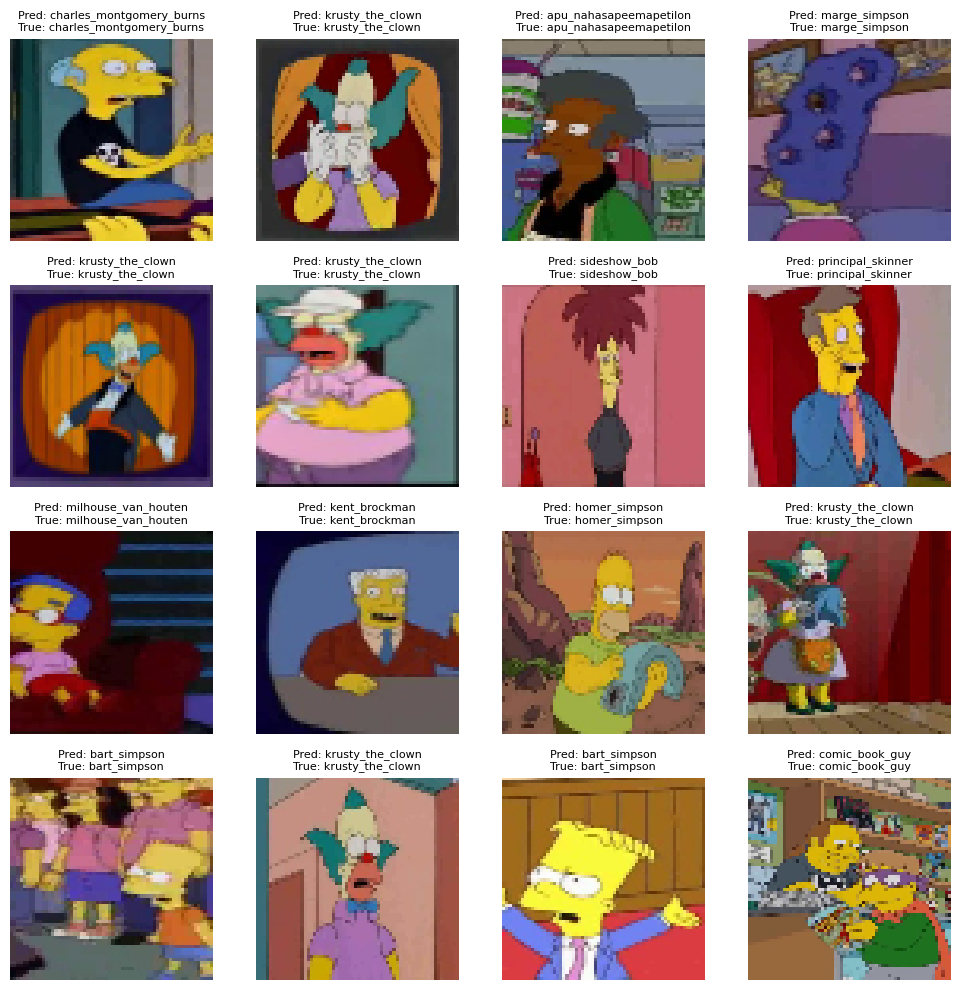

In [19]:
# Lista ordenada de nombres de clases basada en MAP_CHARACTERS
class_names = [MAP_CHARACTERS[i] for i in range(len(MAP_CHARACTERS))]

# Creamos un generador aleatorio independiente del global
rng = np.random.default_rng()  # No depende de np.random.seed

# Seleccionamos 16 índices al azar del conjunto de test
indices = rng.choice(X_test.shape[0], 16, replace=False)

# Seleccionamos las imágenes y las etiquetas correspondientes
sample_images = X_test[indices]
sample_labels = Y_test[indices]

# Hacemos las predicciones
predictions = red_conv.predict(sample_images)

# Mostramos las imágenes con las predicciones en una grilla de 4x4
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')

    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(sample_labels[i])

    pred_name = class_names[predicted_class]
    true_name = class_names[true_class]

    plt.title(f"Pred: {pred_name}\nTrue: {true_name}", fontsize=8)

plt.tight_layout()
plt.show()

En la siguiente sección se realiza la evaluación del rendimiento de la red neuronal utilizando el conjunto de datos de prueba (testing).

In [20]:
loss, accuracy = red_conv.evaluate(X_test, Y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9143 - loss: 0.3740
Test Loss: 0.401062548160553
Test Accuracy: 0.9112359285354614


Al observar los resultados de las métricas, se aprecia que el valor de pérdida (loss) es bajo y la precisión (accuracy)es alta, lo cual en principio sugiere un buen rendimiento del modelo. Sin embargo, estos resultados no son totalmente confiables, ya que existe una diferencia considerable entre la precisión del conjunto de entrenamiento y la del conjunto de validación. Esta brecha es un indicio de sobreentrenamiento (overfitting), lo que significa que el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos. Por esta razón, se recomienda realizar ajustes al modelo en las siguientes etapas del proyecto para mejorar su capacidad de generalización.

A continuación, se graficarán los resultados obtenidos con el fin de facilitar la visualización y comprensión de las métricas evaluadas.

### Gráficos y conclusiones

En esta sección se muestra un gráfico de accuracy de la red base  

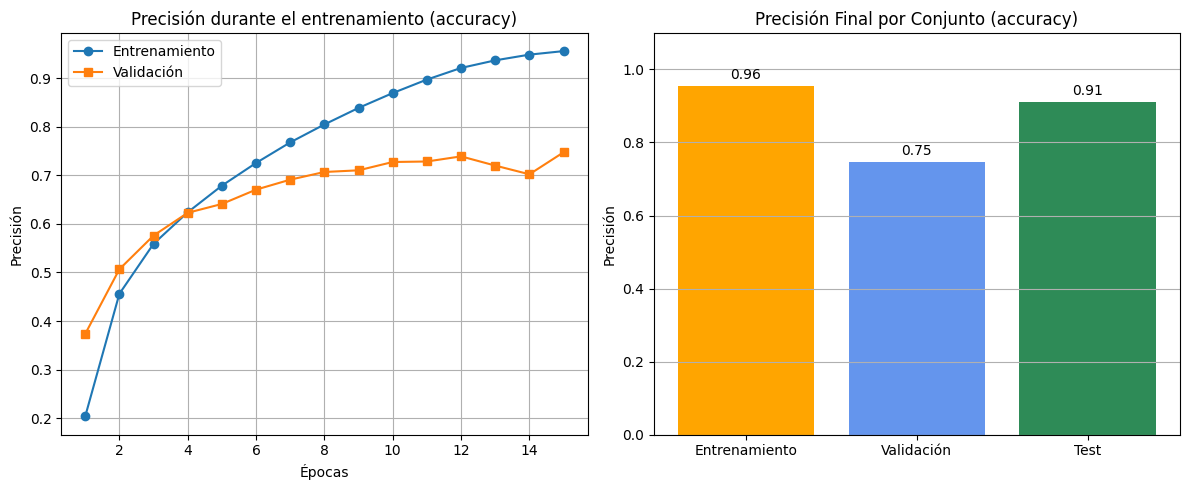

In [21]:
# Extraer métricas de accuracy por época
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Precisión final de cada conjunto
final_train_acc = train_acc[-1]
final_val_acc = val_acc[-1]
test_acc = accuracy  # del evaluate

# Crear figura con dos subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de líneas (Train vs Val Accuracy)
axs[0].plot(epochs, train_acc, label='Entrenamiento', marker='o')
axs[0].plot(epochs, val_acc, label='Validación', marker='s')
axs[0].set_title('Precisión durante el entrenamiento (accuracy)')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Precisión')
axs[0].legend()
axs[0].grid(True)

# Gráfico de barras (Train vs Val vs Test final)
conjuntos = ['Entrenamiento', 'Validación', 'Test']
valores = [final_train_acc, final_val_acc, test_acc]
barras = axs[1].bar(conjuntos, valores, color=['orange', 'cornflowerblue', 'seagreen'])

# Mostrar los valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    axs[1].text(barra.get_x() + barra.get_width() / 2, altura + 0.01, f'{altura:.2f}', ha='center', va='bottom')

axs[1].set_ylim(0, 1.1)
axs[1].set_title('Precisión Final por Conjunto (accuracy)')
axs[1].set_ylabel('Precisión')
axs[1].grid(axis='y')

plt.tight_layout()
plt.show()

Al observar el gráfico que compara el desempeño entre el conjunto de entrenamiento y el de validación, se aprecia que la diferencia entre ambos se incrementa a medida que avanzan las épocas. Además, no se observa convergencia en ningún momento, lo cual es un aspecto deseable para alcanzar una mayor precisión y un mejor desempeño general del modelo.

Por otro lado, el gráfico que compara la precisión final entre los conjuntos de entrenamiento, validación y testing permite visualizar de forma más clara y numérica las diferencias en sus resultados, lo que ayuda a confirmar las conclusiones previamente descritas respecto al sobreentrenamiento.

En esta sección se presentan gráficos de la función de pérdida (Loss) para facilitar la visualización y comprensión de su comportamiento durante y después del entrenamiento del modelo.

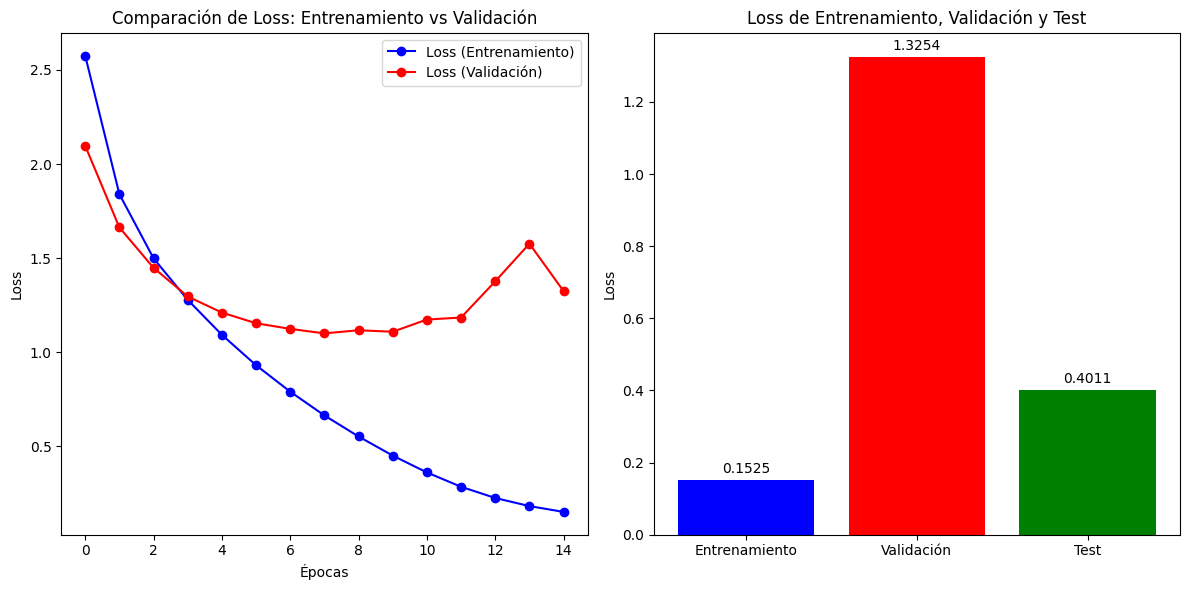

In [22]:
import matplotlib.pyplot as plt

# Extraer el loss para entrenamiento y validación
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']

# Asumimos que tienes el loss de test (puedes sustituir "test_loss" con tu valor real)
loss_test = loss  # Aquí asumes que "loss" es el valor de test que obtuviste durante la evaluación

# Crear el gráfico con dos subgráficos (líneas y barras)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de líneas para el loss de entrenamiento y validación
ax1.plot(loss_train, label='Loss (Entrenamiento)', color='blue', linestyle='-', marker='o')
ax1.plot(loss_val, label='Loss (Validación)', color='red', linestyle='-', marker='o')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Loss')
ax1.set_title('Comparación de Loss: Entrenamiento vs Validación')
ax1.legend()

# Gráfico de barras para comparar el loss de entrenamiento, validación y test
labels = ['Entrenamiento', 'Validación', 'Test']
losses = [loss_train[-1], loss_val[-1], loss_test]  # Usamos el último valor de train y val, y el valor de test

ax2.bar(labels, losses, color=['blue', 'red', 'green'])

# Añadir los valores encima de las barras
for bar in ax2.patches:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

ax2.set_ylabel('Loss')
ax2.set_title('Loss de Entrenamiento, Validación y Test')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Al observar el gráfico que compara la pérdida (loss) entre los conjuntos de entrenamiento y validación, se evidencia una diferencia considerable entre ambos a lo largo de las épocas. Esta falta de convergencia sugiere la presencia de sobreentrenamiento (overfitting) en el modelo.

Del mismo modo, en el gráfico de barras que compara la pérdida final entre los conjuntos de entrenamiento, validación y prueba (testing), se vuelve a observar esta discrepancia, lo que refuerza la conclusión de que el modelo presenta sobreajuste debido a las marcadas diferencias en los valores de pérdida obtenidos en cada conjunto.

A continuación, se presenta la construcción del modelo 2, una versión mejorada del modelo base, con ajustes en su arquitectura para reducir el sobreentrenamiento y optimizar el rendimiento durante el entrenamiento, así como en su posterior evaluación.

## Modelo 2

En la siguiente sección se presenta una mejora en la arquitectura de la red base. Los cambios realizados incluyen el aumento de las capas convolucionales de 2 a 4, la incorporación de la técnica de dropout en dichas capas para reducir el sobreentrenamiento, y la sustitución del optimizador SGD por Adam con una tasa de aprendizaje (learning rate) de 0.001. Este cambio se decidió debido a que Adam suele alcanzar la convergencia más rápidamente, lo que podría traducirse en mejoras en el rendimiento general del modelo.

In [23]:
# Setea los seed para números random

np.random.seed(10)
tf.random.set_seed(10)

# Crea una red neuronal convolucional simple

red_conv_2 = keras.Sequential(name="red_neuronal_2")

red_conv_2.add(Input(shape=(64, 64, 3), name="entrada"))

red_conv_2.add(Conv2D(64, (3,3), activation='relu', padding='same', name="convolucion_1"))
red_conv_2.add(Conv2D(64, (3,3), activation='relu', name="convolucion_2"))
red_conv_2.add(MaxPooling2D((2,2), name="pooling_1"))
red_conv_2.add(tf.keras.layers.Dropout(0.2))

red_conv_2.add(Conv2D(32, (3,3), activation='relu', padding='same', name="convolucion_3"))
red_conv_2.add(Conv2D(32, (3,3), activation='relu', name="convolucion_4"))
red_conv_2.add(MaxPooling2D((2,2), name="pooling_2"))
red_conv_2.add(tf.keras.layers.Dropout(0.2))

red_conv_2.add(Flatten(name="flatten_1"))

red_conv_2.add(Dense(128, activation='relu', name="densa_1"))
red_conv_2.add(Dense(64, activation='relu', name="densa_2"))
red_conv_2.add(Dense(18, activation='softmax', name="salida"))

red_conv_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

En el siguiente bloque se realiza el entrenamiento de la red mejorada (modelo 2), con el objetivo de analizar posteriormente su desempeño a través de las métricas obtenidas.

In [24]:
start_time_2 = time()
hist_2 = red_conv_2.fit(
    X_train,Y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_val,Y_val)
)
end_time_2 = time()
time_2 = end_time_2 - start_time_2
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time_2 - start_time_2))

red_conv_2.save("segundo_modelo.h5")

Epoch 1/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.2804 - loss: 2.3208 - val_accuracy: 0.6410 - val_loss: 1.1804
Epoch 2/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.6939 - loss: 1.0148 - val_accuracy: 0.7465 - val_loss: 0.8563
Epoch 3/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.8027 - loss: 0.6398 - val_accuracy: 0.7876 - val_loss: 0.7759
Epoch 4/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8638 - loss: 0.4375 - val_accuracy: 0.7955 - val_loss: 0.8113
Epoch 5/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8974 - loss: 0.3217 - val_accuracy: 0.7944 - val_loss: 0.8983
Epoch 6/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9128 - loss: 0.2747 - val_accuracy: 0.7981 - val_loss: 0.9245
Epoch 7/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9346 - loss: 0.2053 - val_accuracy: 0.8118 - val_loss: 0.9474
Epoch 8/15
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9433 -

Se puede observar que el objetivo de reducir el sobreentrenamiento fue logrado, ya que la brecha entre el accuracy de entrenamiento y validación es menor en comparación con el modelo base. Para facilitar una mejor comprensión de los valores obtenidos en las métricas, en las siguientes secciones se presentarán gráficos comparativos con respecto al modelo anterior.

En el siguiente bloque se genera una cuadrícula de 4x4 que muestra predicciones aleatorias realizadas sobre el conjunto de prueba (testing). Cada imagen incluye tanto la etiqueta real como la predicción generada por el modelo, lo que permite una comparación visual directa. Estas predicciones se basan en el segundo modelo recientemente entrenado.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


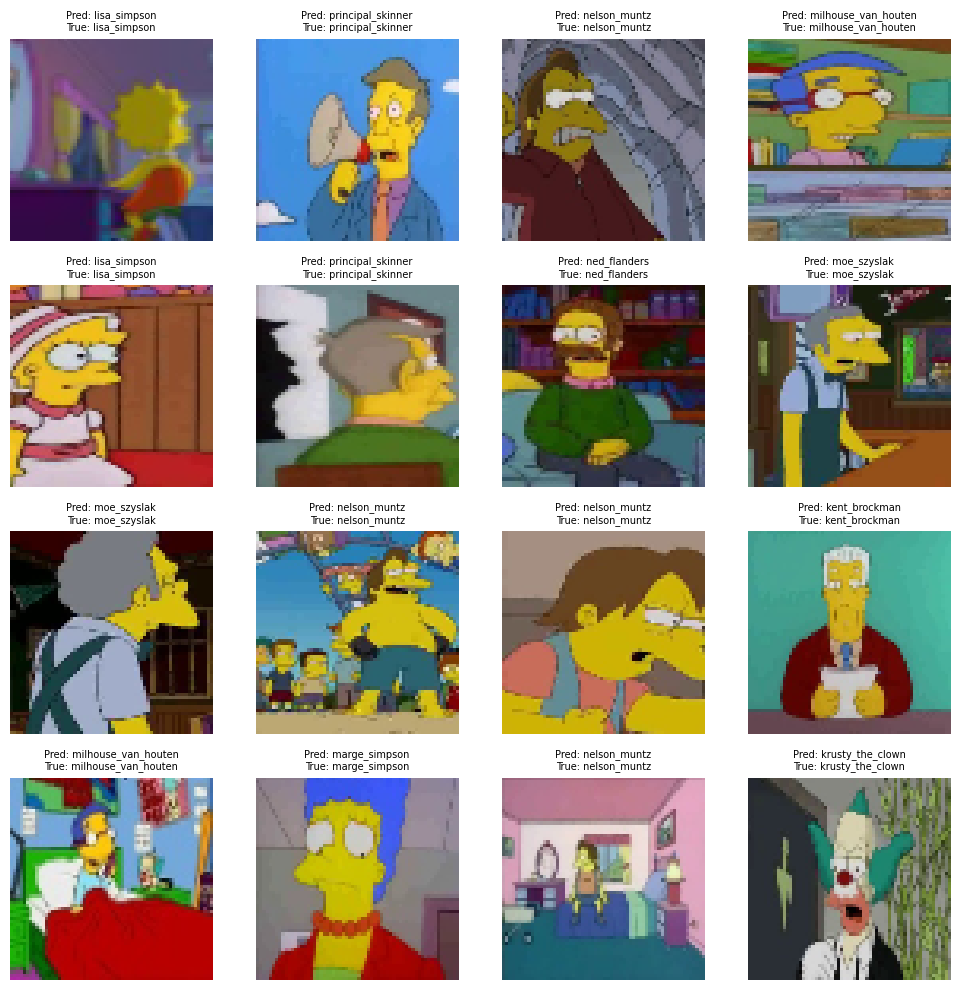

In [25]:

# Lista ordenada de nombres de clases basada en MAP_CHARACTERS
class_names = [MAP_CHARACTERS[i] for i in range(len(MAP_CHARACTERS))]

# Generador aleatorio independiente (no afectado por np.random.seed)
rng = np.random.default_rng()

# Seleccionamos 16 índices al azar del conjunto de test
indices = rng.choice(X_test.shape[0], 16, replace=False)

# Seleccionamos las imágenes y las etiquetas correspondientes
sample_images = X_test[indices]
sample_labels = Y_test[indices]

# Hacemos las predicciones con red_conv_2
predictions = red_conv_2.predict(sample_images)

# Mostramos las imágenes con las predicciones en una grilla de 4x4
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')

    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(sample_labels[i])

    pred_name = class_names[predicted_class]
    true_name = class_names[true_class]

    plt.title(f"Pred: {pred_name}\nTrue: {true_name}", fontsize=7)

plt.tight_layout()
plt.show()


En esta sección se realiza la evaluación del modelo 2 utilizando el conjunto de datos de prueba (testing), con el objetivo de analizar su rendimiento final y verificar si las mejoras implementadas en la arquitectura han tenido un impacto positivo.

In [26]:
loss_red2, accuracy_red2 = red_conv_2.evaluate(X_test, Y_test)

print("Test Loss:", loss_red2)
print("Test Accuracy:", accuracy_red2)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9623 - loss: 0.1955
Test Loss: 0.21862390637397766
Test Accuracy: 0.9561797976493835


Al analizar los resultados de la evaluación del Modelo 2, se observa una mejora en el rendimiento con respecto al modelo anterior. Sin embargo, estos resultados aún no son completamente confiables, ya que persisten indicios de sobreentrenamiento. Esto sugiere que el modelo todavía puede optimizarse para mejorar su capacidad de generalización.

### Gráficos y conclusiones

En el siguiente bloque se realiza un grafico de comparación de accuracy en etrenamiento y validación entre el modelo base y el modelo 2

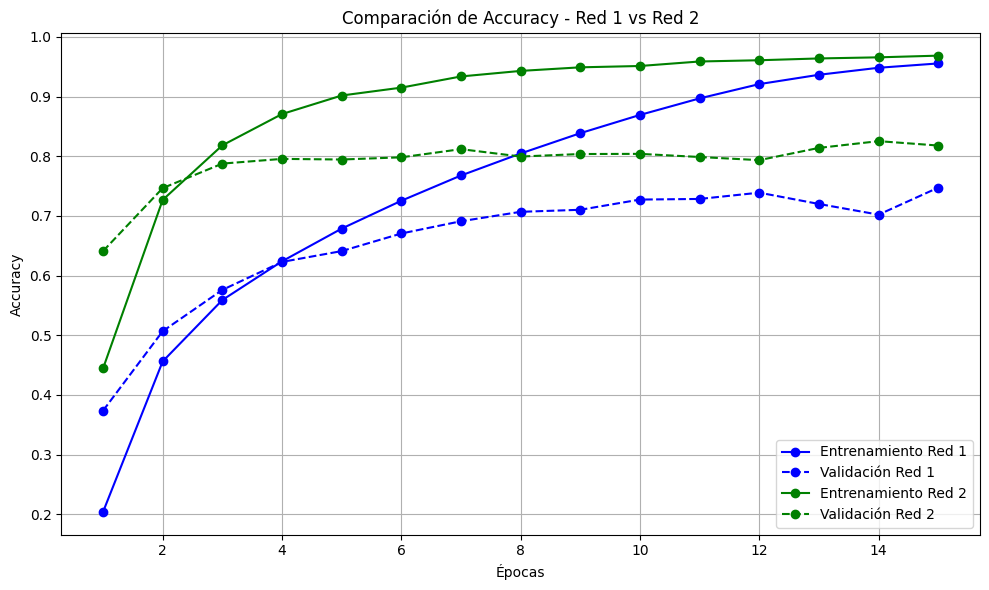

In [27]:
# Accuracy de entrenamiento y validación para red 1
acc_train_1 = hist.history['accuracy']
acc_val_1 = hist.history['val_accuracy']

# Accuracy de entrenamiento y validación para red 2
acc_train_2 = hist_2.history['accuracy']
acc_val_2 = hist_2.history['val_accuracy']

# Crear el gráfico de líneas comparativo con puntos
plt.figure(figsize=(10, 6))
epochs = range(1, len(acc_train_1) + 1)

# Red 1
plt.plot(epochs, acc_train_1, 'b-', marker='o', label='Entrenamiento Red 1')
plt.plot(epochs, acc_val_1, 'b--', marker='o', label='Validación Red 1')

# Red 2
plt.plot(epochs, acc_train_2, 'g-', marker='o', label='Entrenamiento Red 2')
plt.plot(epochs, acc_val_2, 'g--', marker='o', label='Validación Red 2')

# Configuraciones del gráfico
plt.title('Comparación de Accuracy - Red 1 vs Red 2')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Al observar el gráfico del rendimiento de los modelos a lo largo de las 15 épocas de entrenamiento, se puede apreciar que el modelo 2 parte con un mejor rendimiento en comparación al modelo base. Aunque el modelo base presenta una mayor precisión en el conjunto de entrenamiento, esto no implica necesariamente que sea mejor, ya que es importante considerar si existe sobreajuste. Al comparar la diferencia entre la precisión de entrenamiento y validación de ambos modelos, se observa que el modelo 2 presenta una brecha significativamente menor, lo que indica que está menos sobreajustado que el modelo base, aunque aún existe margen de mejora.

En el siguiente bloque se presenta un gráfico de barras que compara la precisión (accuracy) del modelo base y del modelo 2 en los conjuntos de entrenamiento, validación y testing. Esta visualización permite observar de forma clara las diferencias en el rendimiento de ambos modelos en cada etapa del proceso.

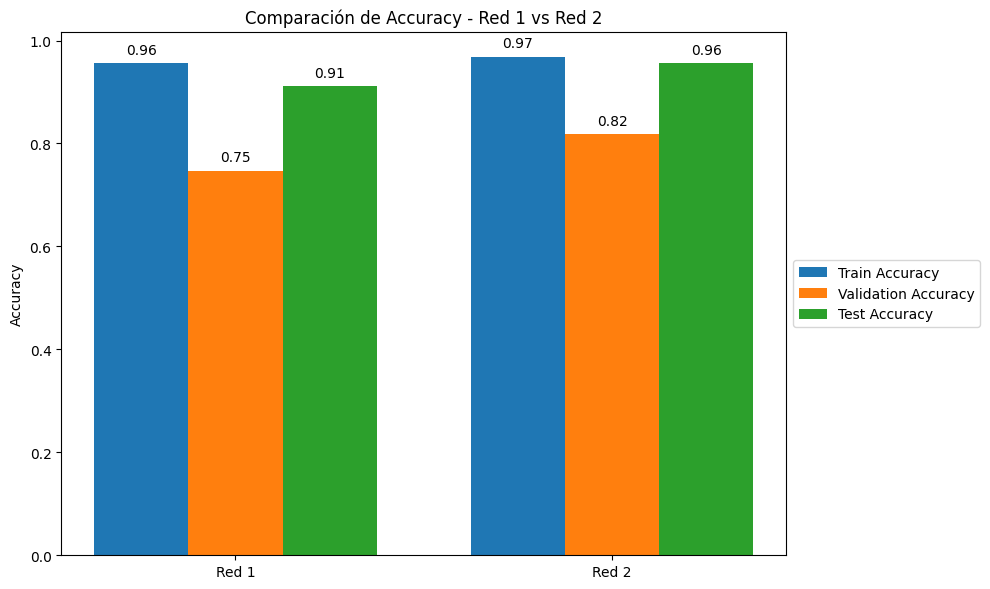

In [28]:
# Datos (utilizando solo el accuracy de la última época para cada red)
labels = ['Red 1', 'Red 2']
train_acc = [acc_train_1[-1], acc_train_2[-1]]  # Última época para Train Accuracy
val_acc = [acc_val_1[-1], acc_val_2[-1]]  # Última época para Validation Accuracy
test_acc = [accuracy, accuracy_red2]  # Aquí asumimos que 'accuracy' es el de la última época para test

x = np.arange(len(labels))
width = 0.25

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Barras de entrenamiento, validación y test
bars1 = ax.bar(x - width, train_acc, width, label='Train Accuracy')
bars2 = ax.bar(x, val_acc, width, label='Validation Accuracy')
bars3 = ax.bar(x + width, test_acc, width, label='Test Accuracy')

# Mostrar valores por encima de las barras con separación ajustada
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height + 0.01),
                    xytext=(0, 1),  # Separación más pequeña para que quede dentro del gráfico
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

# Etiquetas y título
ax.set_ylabel('Accuracy')
ax.set_title('Comparación de Accuracy - Red 1 vs Red 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Mover la leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Al observar el gráfico de comparación, se puede afirmar que el modelo 2 presenta un mejor rendimiento en el conjunto de testing. Esto se debe a que muestra una menor diferencia entre los resultados de entrenamiento y validación, lo que indica un menor nivel de sobreajuste en comparación con el modelo base.

En el siguiente bloque se presenta un gráfico comparativo de la pérdida (loss) en la última época de entrenamiento y validación, junto con el loss obtenido en el conjunto de testing, para evaluar el desempeño final y la capacidad de generalización de los modelos.

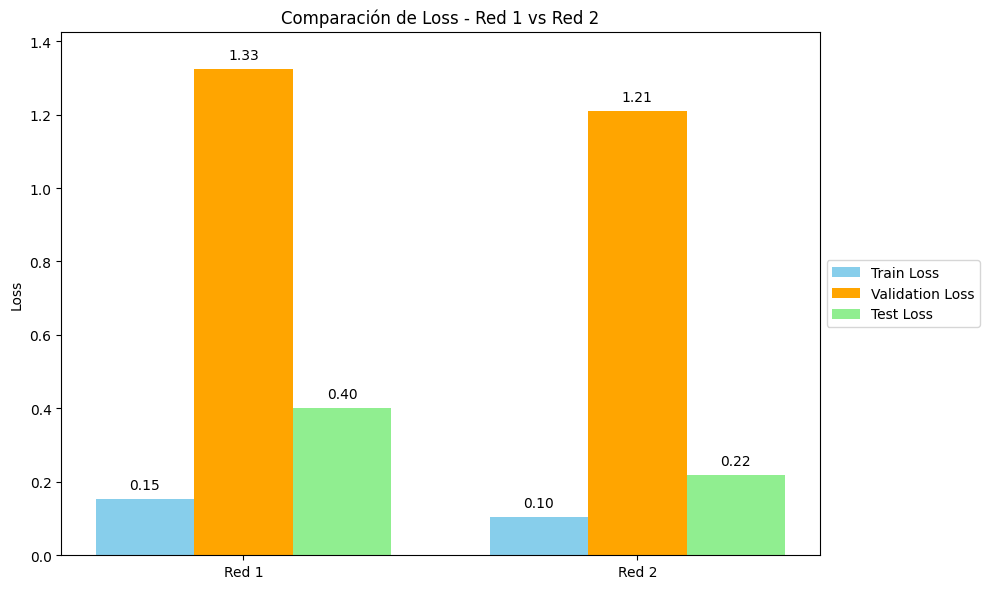

In [29]:
# Extraer los últimos valores de loss de entrenamiento y validación
loss_train_1_last = hist.history['loss'][-1]
loss_train_2_last = hist_2.history['loss'][-1]
loss_val_1_last = hist.history['val_loss'][-1]
loss_val_2_last = hist_2.history['val_loss'][-1]

# Datos
labels = ['Red 1', 'Red 2']
train_loss = [loss_train_1_last, loss_train_2_last]
val_loss = [loss_val_1_last, loss_val_2_last]
test_loss = [loss, loss_red2]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, train_loss, width, label='Train Loss', color='skyblue')
bars2 = ax.bar(x, val_loss, width, label='Validation Loss', color='orange')
bars3 = ax.bar(x + width, test_loss, width, label='Test Loss', color='lightgreen')

# Mostrar valores sobre las barras, con separación estética
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Separado 5 puntos por encima
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

# Ajustar límite superior del eje Y para evitar que se corte el texto
max_height = max(max(train_loss), max(val_loss), max(test_loss))
ax.set_ylim(0, max_height + 0.1)

# Configuraciones del gráfico
ax.set_ylabel('Loss')
ax.set_title('Comparación de Loss - Red 1 vs Red 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Mover la leyenda al costado derecho
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Al observar el gráfico de la pérdida (Loss), se aprecia una mejora tras modificar la arquitectura de la red, ya que el Modelo 2 presenta valores más bajos de pérdida en los conjuntos de entrenamiento, validación y testing, en comparación con el modelo base. Esto indica que el Modelo 2 logra una mejor capacidad de generalización frente a datos no vistos.

En el siguiente bloque se presenta un gráfico comparativo que muestra los tiempos de entrenamiento de ambos modelos.

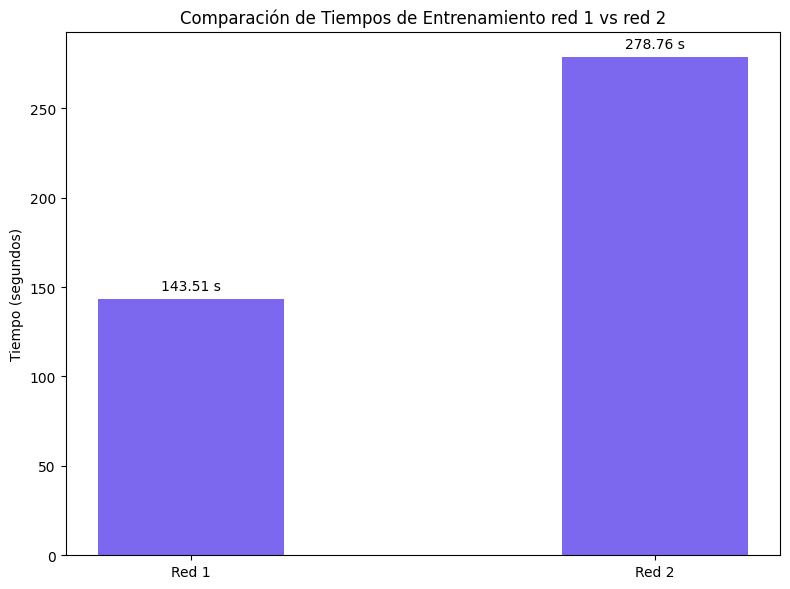

In [30]:
labels = ['Red 1', 'Red 2']
training_times = [time_1, time_2]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(x, training_times, width, color='mediumslateblue', label='Tiempo de entrenamiento')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f} s',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

ax.set_ylabel('Tiempo (segundos)')
ax.set_title('Comparación de Tiempos de Entrenamiento red 1 vs red 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

Al comparar los tiempos de entrenamiento entre los modelos, se observa que el Modelo 2 presenta un tiempo de entrenamiento ligeramente mayor. No obstante, esta diferencia no resulta significativa, ya que se mide en minutos, debido al uso de un entorno con GPU proporcionado por Google Colab, el cual acelera considerablemente los procesos. Sin embargo, es importante tener en cuenta que estos recursos son limitados en la versión gratuita, y al trabajar con volúmenes de datos más grandes o modelos más complejos, es posible que se restrinja el acceso a la GPU, lo que impide continuar utilizando este recurso de forma constante. Por ello, se deben considerar alternativas como la versión de pago de Colab o la ejecución en entornos locales con recursos adecuados.

## Modelo 3

En la siguiente sección se presenta una mejora en la arquitectura del modelo 2. Los cambios realizados incluyen que en las capas convolucionales 1 y 2 el número de filtros se reduce de 64 a 32, mientras que en las capas convolucionales 3 y 4 se incrementa de 32 a 64. Esta modificación se justifica en la estrategia de detección progresiva de características, donde las primeras capas, al captar patrones básicos como bordes y texturas, pueden trabajar con un menor número de filtros para optimizar la eficiencia computacional. Por otro lado, las capas posteriores, que identifican patrones más complejos y abstractos, requieren un mayor número de filtros para mejorar la capacidad de representación del modelo.

Además, se incorpora la técnica de dropout en las capas densas con el objetivo de reducir el sobreentrenamiento (overfitting), promoviendo una mejor generalización del modelo frente a datos no vistos. Esta combinación de ajustes en la arquitectura busca equilibrar la capacidad del modelo con la eficiencia y robustez durante el entrenamiento.

In [31]:
# Setea los seed para números random

np.random.seed(10)
tf.random.set_seed(10)

# Crea una red neuronal convolucional

# Setea los seed para números random

np.random.seed(10)
tf.random.set_seed(10)

# Crea una red neuronal convolucional

red_conv3 = keras.Sequential(name="red_neuronal_3")

red_conv3.add(Input(shape=(64, 64, 3), name="entrada"))

red_conv3.add(Conv2D(32, (3,3), activation='relu', padding='same', name="convolucion_1"))
red_conv3.add(Conv2D(32, (3,3), activation='relu', name="convolucion_2"))
red_conv3.add(MaxPooling2D((2,2), name="pooling_1"))
red_conv3.add(tf.keras.layers.Dropout(0.2))

red_conv3.add(Conv2D(64, (3,3), activation='relu', padding='same', name="convolucion_3"))
red_conv3.add(Conv2D(64, (3,3), activation='relu', name="convolucion_4"))
red_conv3.add(MaxPooling2D((2,2), name="pooling_2"))
red_conv3.add(tf.keras.layers.Dropout(0.2))

red_conv3.add(Flatten(name="flatten_1"))

red_conv3.add(Dense(128, activation='relu', name="densa_1"))
red_conv3.add(tf.keras.layers.Dropout(0.5))
red_conv3.add(Dense(64, activation='relu', name="densa_2"))
red_conv3.add(tf.keras.layers.Dropout(0.5))
red_conv3.add(Dense(18, activation='softmax', name="salida"))

red_conv3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

En la siguiente sección se realiza el entrenamiento del modelo, en el cual se incrementa el número de épocas de 15 a 30 con el objetivo de evaluar si el rendimiento continúa mejorando o si el modelo alcanza una etapa de estabilización.

In [32]:
# Definir el callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitorizamos la pérdida de validación
    patience=5,            # Esperar 5 épocas sin mejora antes de detener
    restore_best_weights=True  # Restaurar los pesos del mejor modelo
)

start_time_conv3 = time()
hist_3 = red_conv3.fit(
    X_train,Y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_val,Y_val),
    callbacks=[early_stopping]  # Añadimos el callback aquí
)
end_time_conv3 = time()
time_3 = end_time_conv3 - start_time_conv3
print("Tiempo de entrenamiento: %0.10f segundos" % (end_time_conv3 - start_time_conv3))

red_conv3.save("tercer_modelo.h5")

Epoch 1/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.1069 - loss: 2.7822 - val_accuracy: 0.2466 - val_loss: 2.3414
Epoch 2/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.2593 - loss: 2.3106 - val_accuracy: 0.4017 - val_loss: 1.8377
Epoch 3/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3893 - loss: 1.9249 - val_accuracy: 0.4796 - val_loss: 1.5649
Epoch 4/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5019 - loss: 1.6054 - val_accuracy: 0.5812 - val_loss: 1.2839
Epoch 5/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.5786 - loss: 1.3815 - val_accuracy: 0.6660 - val_loss: 1.0634
Epoch 6/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6301 - loss: 1.1948 - val_accuracy: 0.6810 - val_loss: 1.0024
Epoch 7/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6706 - loss: 1.0806 - val_accuracy: 0.6933 - val_loss: 0.9276
Epoch 8/30
1006/1006 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6966 -

Luego del entrenamiento, se observa una diferencia mínima entre los valores de precisión (accuracy) en los conjuntos de entrenamiento y validación, especialmente en comparación con el modelo 2. Esta pequeña brecha indica que el modelo 3 ya no presenta sobreajuste y que logra generalizar de manera adecuada a datos no vistos durante el entrenamiento, lo cual es un signo de un buen desempeño y mayor confiabilidad del modelo.

En el siguiente bloque se genera una cuadrícula de 4x4 que muestra predicciones aleatorias realizadas sobre el conjunto de prueba (testing). Cada imagen incluye tanto la etiqueta real como la predicción generada por el modelo, lo que permite una comparación visual directa. Estas predicciones se basan en el modelo 3 recientemente entrenado.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step


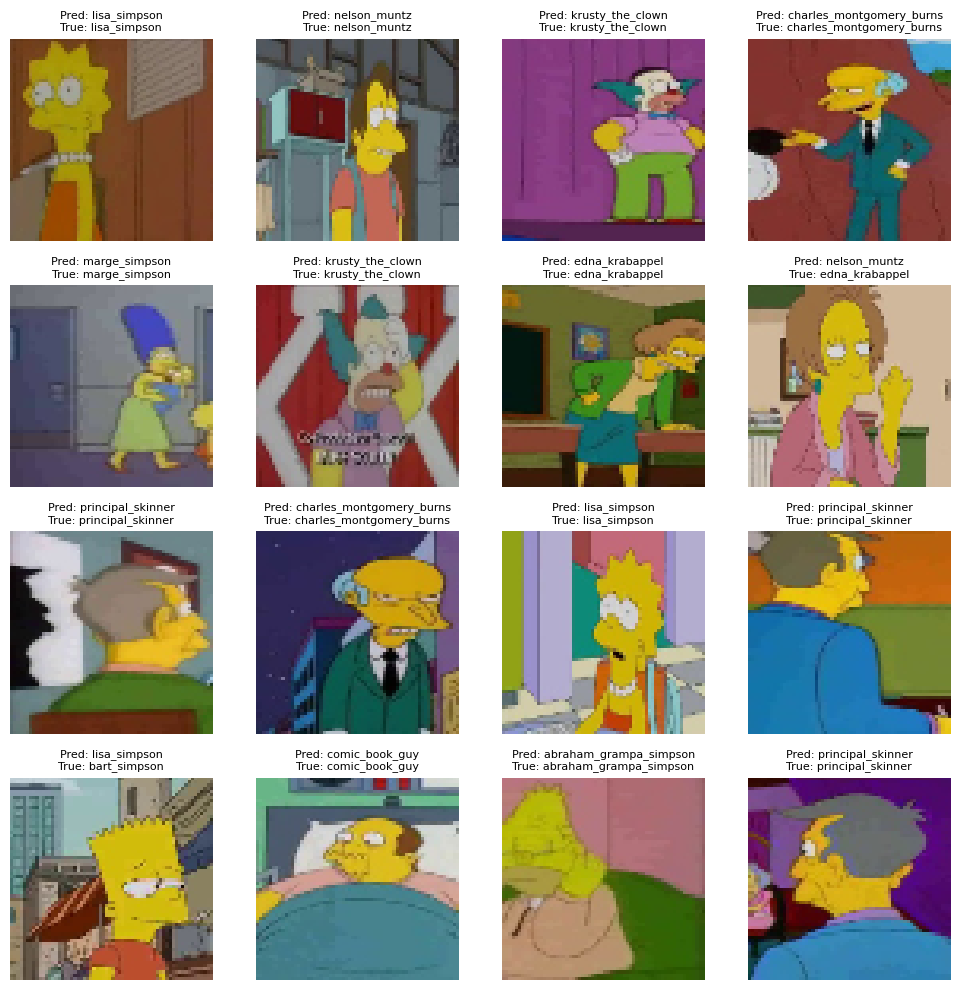

In [33]:
# Lista ordenada de nombres de clases basada en MAP_CHARACTERS
class_names = [MAP_CHARACTERS[i] for i in range(len(MAP_CHARACTERS))]

# Generador aleatorio independiente
rng = np.random.default_rng()

# Seleccionamos 16 índices al azar del conjunto de test
indices = rng.choice(X_test.shape[0], 16, replace=False)

# Seleccionamos las imágenes y las etiquetas correspondientes
sample_images = X_test[indices]
sample_labels = Y_test[indices]

# Hacemos las predicciones
predictions = red_conv3.predict(sample_images)

# Mostramos las imágenes con las predicciones en una grilla de 4x4
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')

    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(sample_labels[i])

    pred_name = class_names[predicted_class]
    true_name = class_names[true_class]

    plt.title(f"Pred: {pred_name}\nTrue: {true_name}", fontsize=8)

plt.tight_layout()
plt.show()

En esta sección se realiza la evaluación del modelo 3 utilizando el conjunto de datos de prueba (testing), con el objetivo de analizar su rendimiento final y verificar si las mejoras implementadas en la arquitectura han tenido un impacto positivo.

In [34]:
loss_red3, accuracy_red3 = red_conv3.evaluate(X_test, Y_test)

print("Test Loss:", loss_red3)
print("Test Accuracy:", accuracy_red3)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9213 - loss: 0.2816
Test Loss: 0.2709350883960724
Test Accuracy: 0.9269663095474243


Luego de realizar la evaluación del modelo, se observa que este presenta un alto nivel de exactitud (accuracy) en el conjunto de prueba (testing). Este resultado es confiable, ya que no se evidencia sobreajuste (overfitting), lo que sugiere que el modelo tiene una buena capacidad de generalización frente a datos no vistos.

### Gráficos y conclusiones

En esta sección se presenta un gráfico comparativo del accuracy de las redes 2 y 3 a lo largo de las distintas épocas del entrenamiento, permitiendo visualizar y analizar la evolución del desempeño de cada modelo durante el proceso.

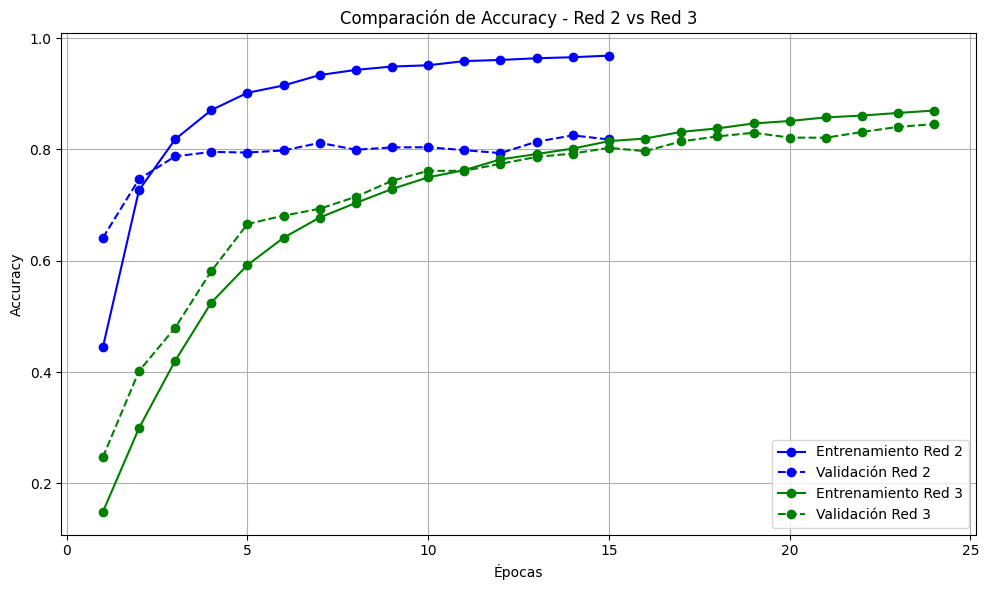

In [35]:
# Accuracy de entrenamiento y validación para red 2
acc_train_2 = hist_2.history['accuracy']
acc_val_2 = hist_2.history['val_accuracy']

# Accuracy de entrenamiento y validación para red 3
acc_train_3 = hist_3.history['accuracy']
acc_val_3 = hist_3.history['val_accuracy']

# Detectar la cantidad de épocas entrenadas para cada red
epochs_2 = len(acc_train_2)
epochs_3 = len(acc_train_3)

# Usar la mayor cantidad de épocas como referencia para el eje X
max_epochs = max(epochs_2, epochs_3)
epochs = range(1, max_epochs + 1)

# Crear el gráfico de líneas comparativo con puntos
plt.figure(figsize=(10, 6))

# Red 2
plt.plot(range(1, epochs_2 + 1), acc_train_2, 'b-', marker='o', label='Entrenamiento Red 2')
plt.plot(range(1, epochs_2 + 1), acc_val_2, 'b--', marker='o', label='Validación Red 2')

# Red 3
plt.plot(range(1, epochs_3 + 1), acc_train_3, 'g-', marker='o', label='Entrenamiento Red 3')
plt.plot(range(1, epochs_3 + 1), acc_val_3, 'g--', marker='o', label='Validación Red 3')

# Configuraciones del gráfico
plt.title('Comparación de Accuracy - Red 2 vs Red 3')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Luego de analizar el gráfico, se puede identificar que las mejoras implementadas en el modelo 3 cumplieron su objetivo, ya que se observa una convergencia clara entre las curvas de entrenamiento y validación. Esto indica que el modelo 3 ha logrado reducir el sobreentrenamiento en comparación con el modelo 2.

En esta sección se comparan los resultados finales de precisión (accuracy) correspondientes a los conjuntos de entrenamiento, validación y testing para los modelos 2 y 3.

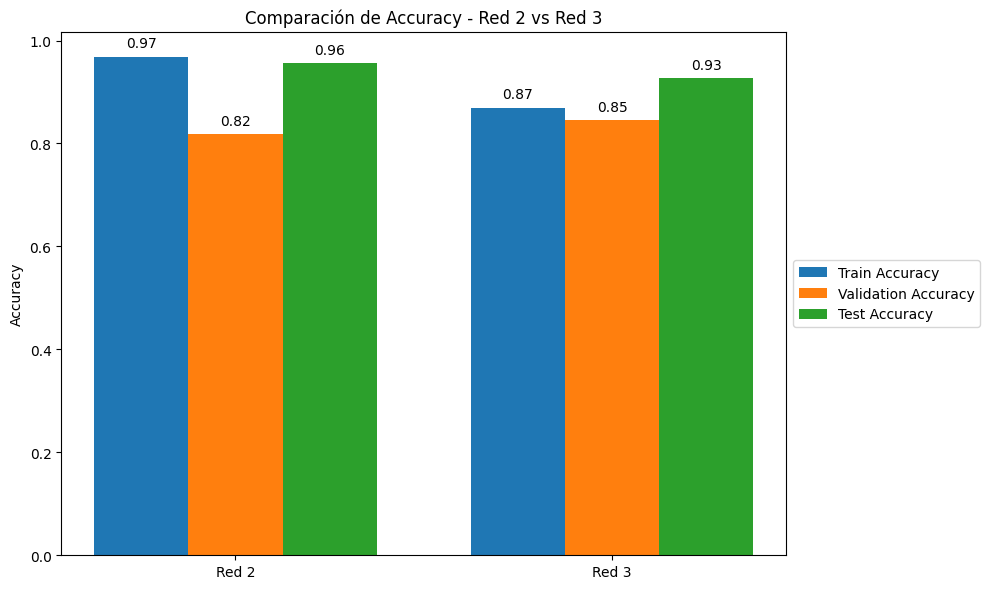

In [36]:
# Datos (utilizando solo el accuracy de la última época para cada red)
labels = ['Red 2', 'Red 3']
train_acc = [acc_train_2[-1], acc_train_3[-1]]  # Última época para Train Accuracy
val_acc = [acc_val_2[-1], acc_val_3[-1]]  # Última época para Validation Accuracy
test_acc = [accuracy_red2, accuracy_red3]  # Aquí asumimos que 'accuracy' es el de la última época para test

x = np.arange(len(labels))
width = 0.25

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Barras de entrenamiento, validación y test
bars1 = ax.bar(x - width, train_acc, width, label='Train Accuracy')
bars2 = ax.bar(x, val_acc, width, label='Validation Accuracy')
bars3 = ax.bar(x + width, test_acc, width, label='Test Accuracy')

# Mostrar valores por encima de las barras con separación ajustada
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height + 0.01),
                    xytext=(0, 1),  # Separación más pequeña para que quede dentro del gráfico
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

# Etiquetas y título
ax.set_ylabel('Accuracy')
ax.set_title('Comparación de Accuracy - Red 2 vs Red 3')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Mover la leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Al analizar el gráfico, se puede notar que aunque el modelo 3 presenta valores de precisión (accuracy) un poco más bajos que el modelo 2, sus resultados son más confiables. Esto se debe a que el modelo 3 no muestra señales de sobreentrenamiento, lo que indica que puede generalizar mejor a datos nuevos. En cambio, el modelo 2, aunque tiene una precisión alta, presenta sobreentrenamiento, por lo que sus resultados no son tan confiables, especialmente en el conjunto de prueba.

En esta sección se presenta una comparación visual mediante un gráfico de barras de la función de pérdida (loss) final obtenida por los modelos 2 y 3. Este análisis permite evaluar cuál de los modelos logra minimizar mejor la pérdida durante el entrenamiento, validación y testing, facilitando la interpretación del rendimiento general y la capacidad de generalización de cada modelo.

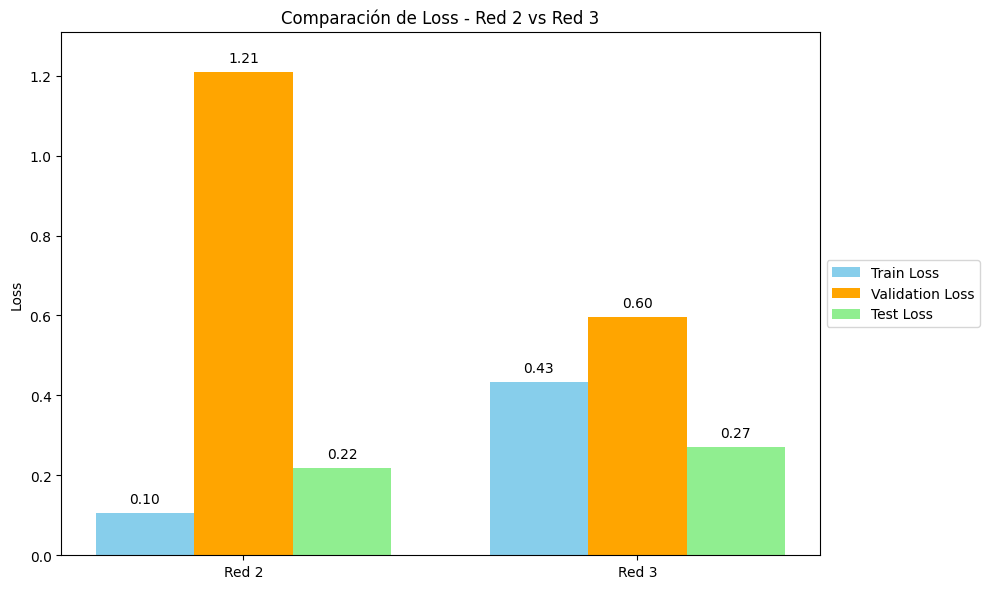

In [37]:
# Extraer los últimos valores de loss de entrenamiento y validación
loss_train_2_last = hist_2.history['loss'][-1]
loss_train_3_last = hist_3.history['loss'][-1]
loss_val_2_last = hist_2.history['val_loss'][-1]
loss_val_3_last = hist_3.history['val_loss'][-1]

# Datos
labels = ['Red 2', 'Red 3']
train_loss = [loss_train_2_last, loss_train_3_last]
val_loss = [loss_val_2_last, loss_val_3_last]
test_loss = [loss_red2, loss_red3]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - width, train_loss, width, label='Train Loss', color='skyblue')
bars2 = ax.bar(x, val_loss, width, label='Validation Loss', color='orange')
bars3 = ax.bar(x + width, test_loss, width, label='Test Loss', color='lightgreen')

# Mostrar valores sobre las barras, con separación estética
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Separado 5 puntos por encima
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10)

# Ajustar límite superior del eje Y para evitar que se corte el texto
max_height = max(max(train_loss), max(val_loss), max(test_loss))
ax.set_ylim(0, max_height + 0.1)

# Configuraciones del gráfico
ax.set_ylabel('Loss')
ax.set_title('Comparación de Loss - Red 2 vs Red 3')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Mover la leyenda al costado derecho
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Al observar el gráfico de barras que compara la función de pérdida entre los modelos 2 y 3 en los conjuntos de entrenamiento, validación y testing, se evidencia un comportamiento más equilibrado en el modelo 3. El modelo 2 presenta una pérdida muy baja en entrenamiento, pero considerablemente más alta en validación, lo que refleja una mala generalización y un claro sobreentrenamiento.

En cambio, el modelo 3 muestra valores de pérdida más cercanos entre los tres conjuntos, lo que indica que el modelo aprende de forma más estable y consistente, logrando un mejor equilibrio entre el ajuste al conjunto de entrenamiento y su capacidad de generalizar a nuevos datos.

En conclusión, el modelo 3 demuestra un rendimiento más confiable y robusto en términos de función de pérdida, mientras que el modelo 2, a pesar de su baja pérdida en entrenamiento, falla en mantener ese rendimiento en los otros conjuntos debido al sobreentrenamiento.

En esta sección se presenta un gráfico que compara los tiempos de entrenamiento de los modelos 2 y 3, con el objetivo de analizar la diferencia en el tiempo requerido por cada uno durante el proceso de aprendizaje.

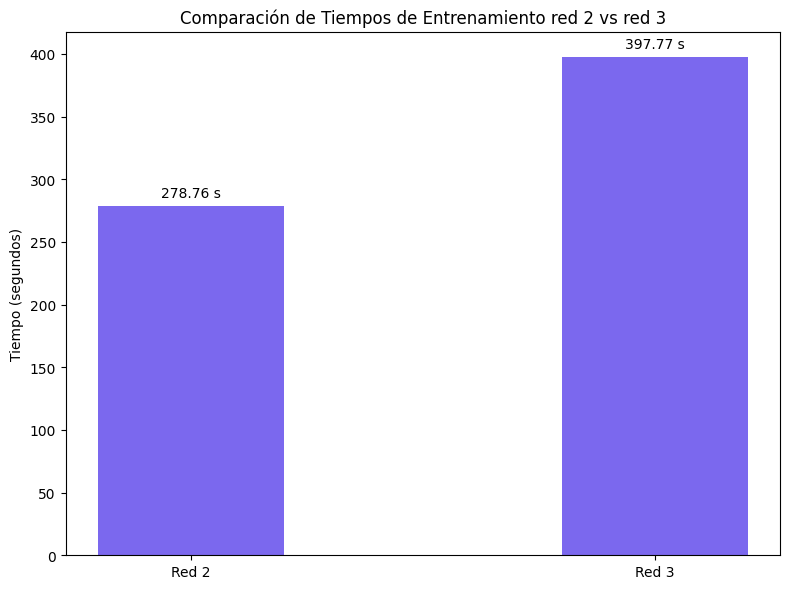

In [38]:
labels = ['Red 2', 'Red 3']
training_times = [time_2, time_3]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(x, training_times, width, color='mediumslateblue', label='Tiempo de entrenamiento')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f} s',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

ax.set_ylabel('Tiempo (segundos)')
ax.set_title('Comparación de Tiempos de Entrenamiento red 2 vs red 3')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

A partir del análisis de los tiempos de entrenamiento, se concluye que el Modelo 3 requiere más tiempo para completar el proceso en comparación con el Modelo 2. Esta diferencia puede atribuirse a los ajustes realizados en la arquitectura del Modelo 3, los cuales, aunque implican un mayor costo computacional, han permitido mejorar la generalización del modelo. Cabe destacar que, si bien los tiempos no resultan excesivos gracias al uso de la GPU en Google Colab, este recurso es limitado en su versión gratuita. Por lo tanto, al escalar el trabajo con más datos o modelos más robustos, se debe considerar el impacto que esto puede tener en la disponibilidad de recursos y planificar posibles soluciones.

# Conclusión final

El objetivo de este proyecto fue analizar el impacto de incorporar capas de convolución y pooling a una red neuronal simple. A lo largo del desarrollo y comparación entre los modelos, se pudo observar cómo estos elementos modifican el comportamiento de la red en términos de aprendizaje, precisión y sobreentrenamiento.

Al incluir capas de convolución, la red fue capaz de extraer mejor las características relevantes de las imágenes, mientras que el pooling ayudó a reducir la cantidad de parámetros y a controlar el sobreajuste. Esto se reflejó en los resultados obtenidos por el modelo 3, el cual mostró una mejor generalización frente a datos nuevos y no presentó sobreentrenamiento, a diferencia del modelo 2.

Como recomendaciones para mejorar el rendimiento del modelo, sería buena idea ajustar la arquitectura comenzando con menos filtros en la primera capa convolucional e ir aumentándolos en las siguientes. Esto permite que el modelo aprenda primero las características más simples y después las más complejas, evitando perder información desde el inicio.

También se puede modificar el uso de Dropout en las capas convolucionales y densas, ya que ajustarlo puede ayudar a reducir el sobreajuste sin afectar demasiado el aprendizaje del modelo.

Además, aunque el modelo fue entrenado con SGD y Adam, se podrían probar otros optimizadores como RMSprop o Nadam, que en algunos casos dan mejores resultados. Otra recomendación sería disminuir el batch size, ya que a veces usar valores más pequeños permite que el modelo tenga un mejor ajuste en la función de pérdida.

Por último, fue útil usar data augmentation y early stopping, y se podrían complementar con otras técnicas como ReduceLROnPlateau, que ajusta la tasa de aprendizaje automáticamente si el modelo se estanca durante el entrenamiento.

En conclusión, agregar capas de convolución y pooling a una red neuronal simple tiene un impacto positivo, y con las recomendaciones anteriores se podrían obtener resultados aún mejores.